# Demonstrations

## Neural Network Demonstration

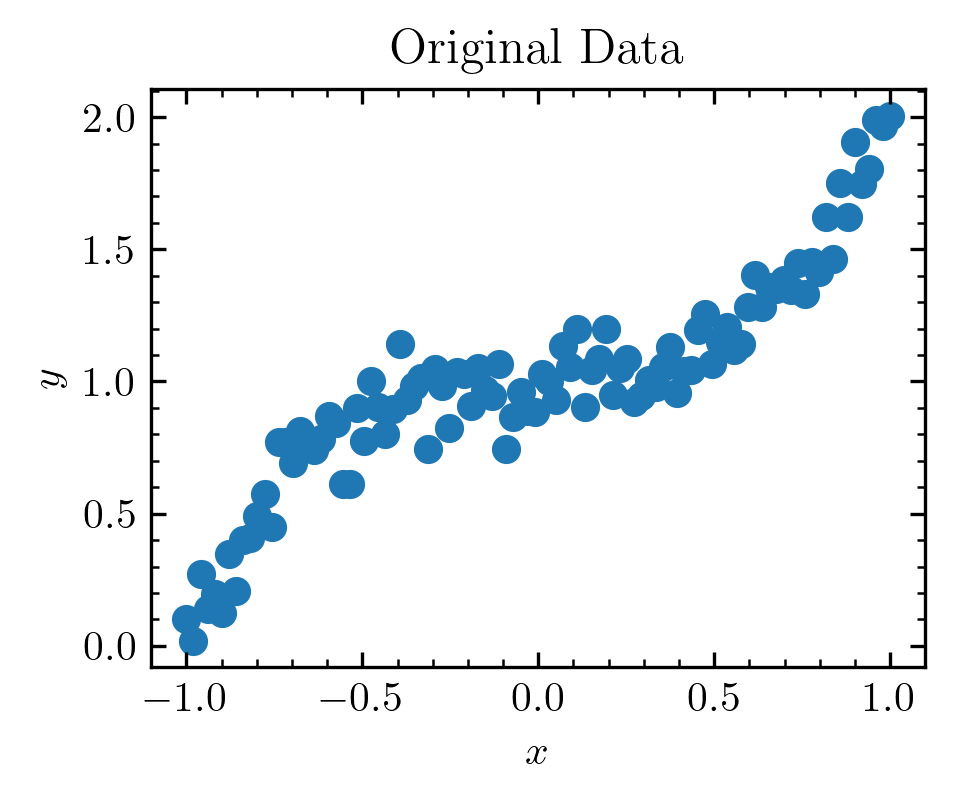

In [4]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, +1, 100).reshape(-1, 1)
y = X[:, 0]**3 + np.random.normal(scale=0.1, size=len(X)) + 1
plt.scatter(X[:, 0], y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Original Data');

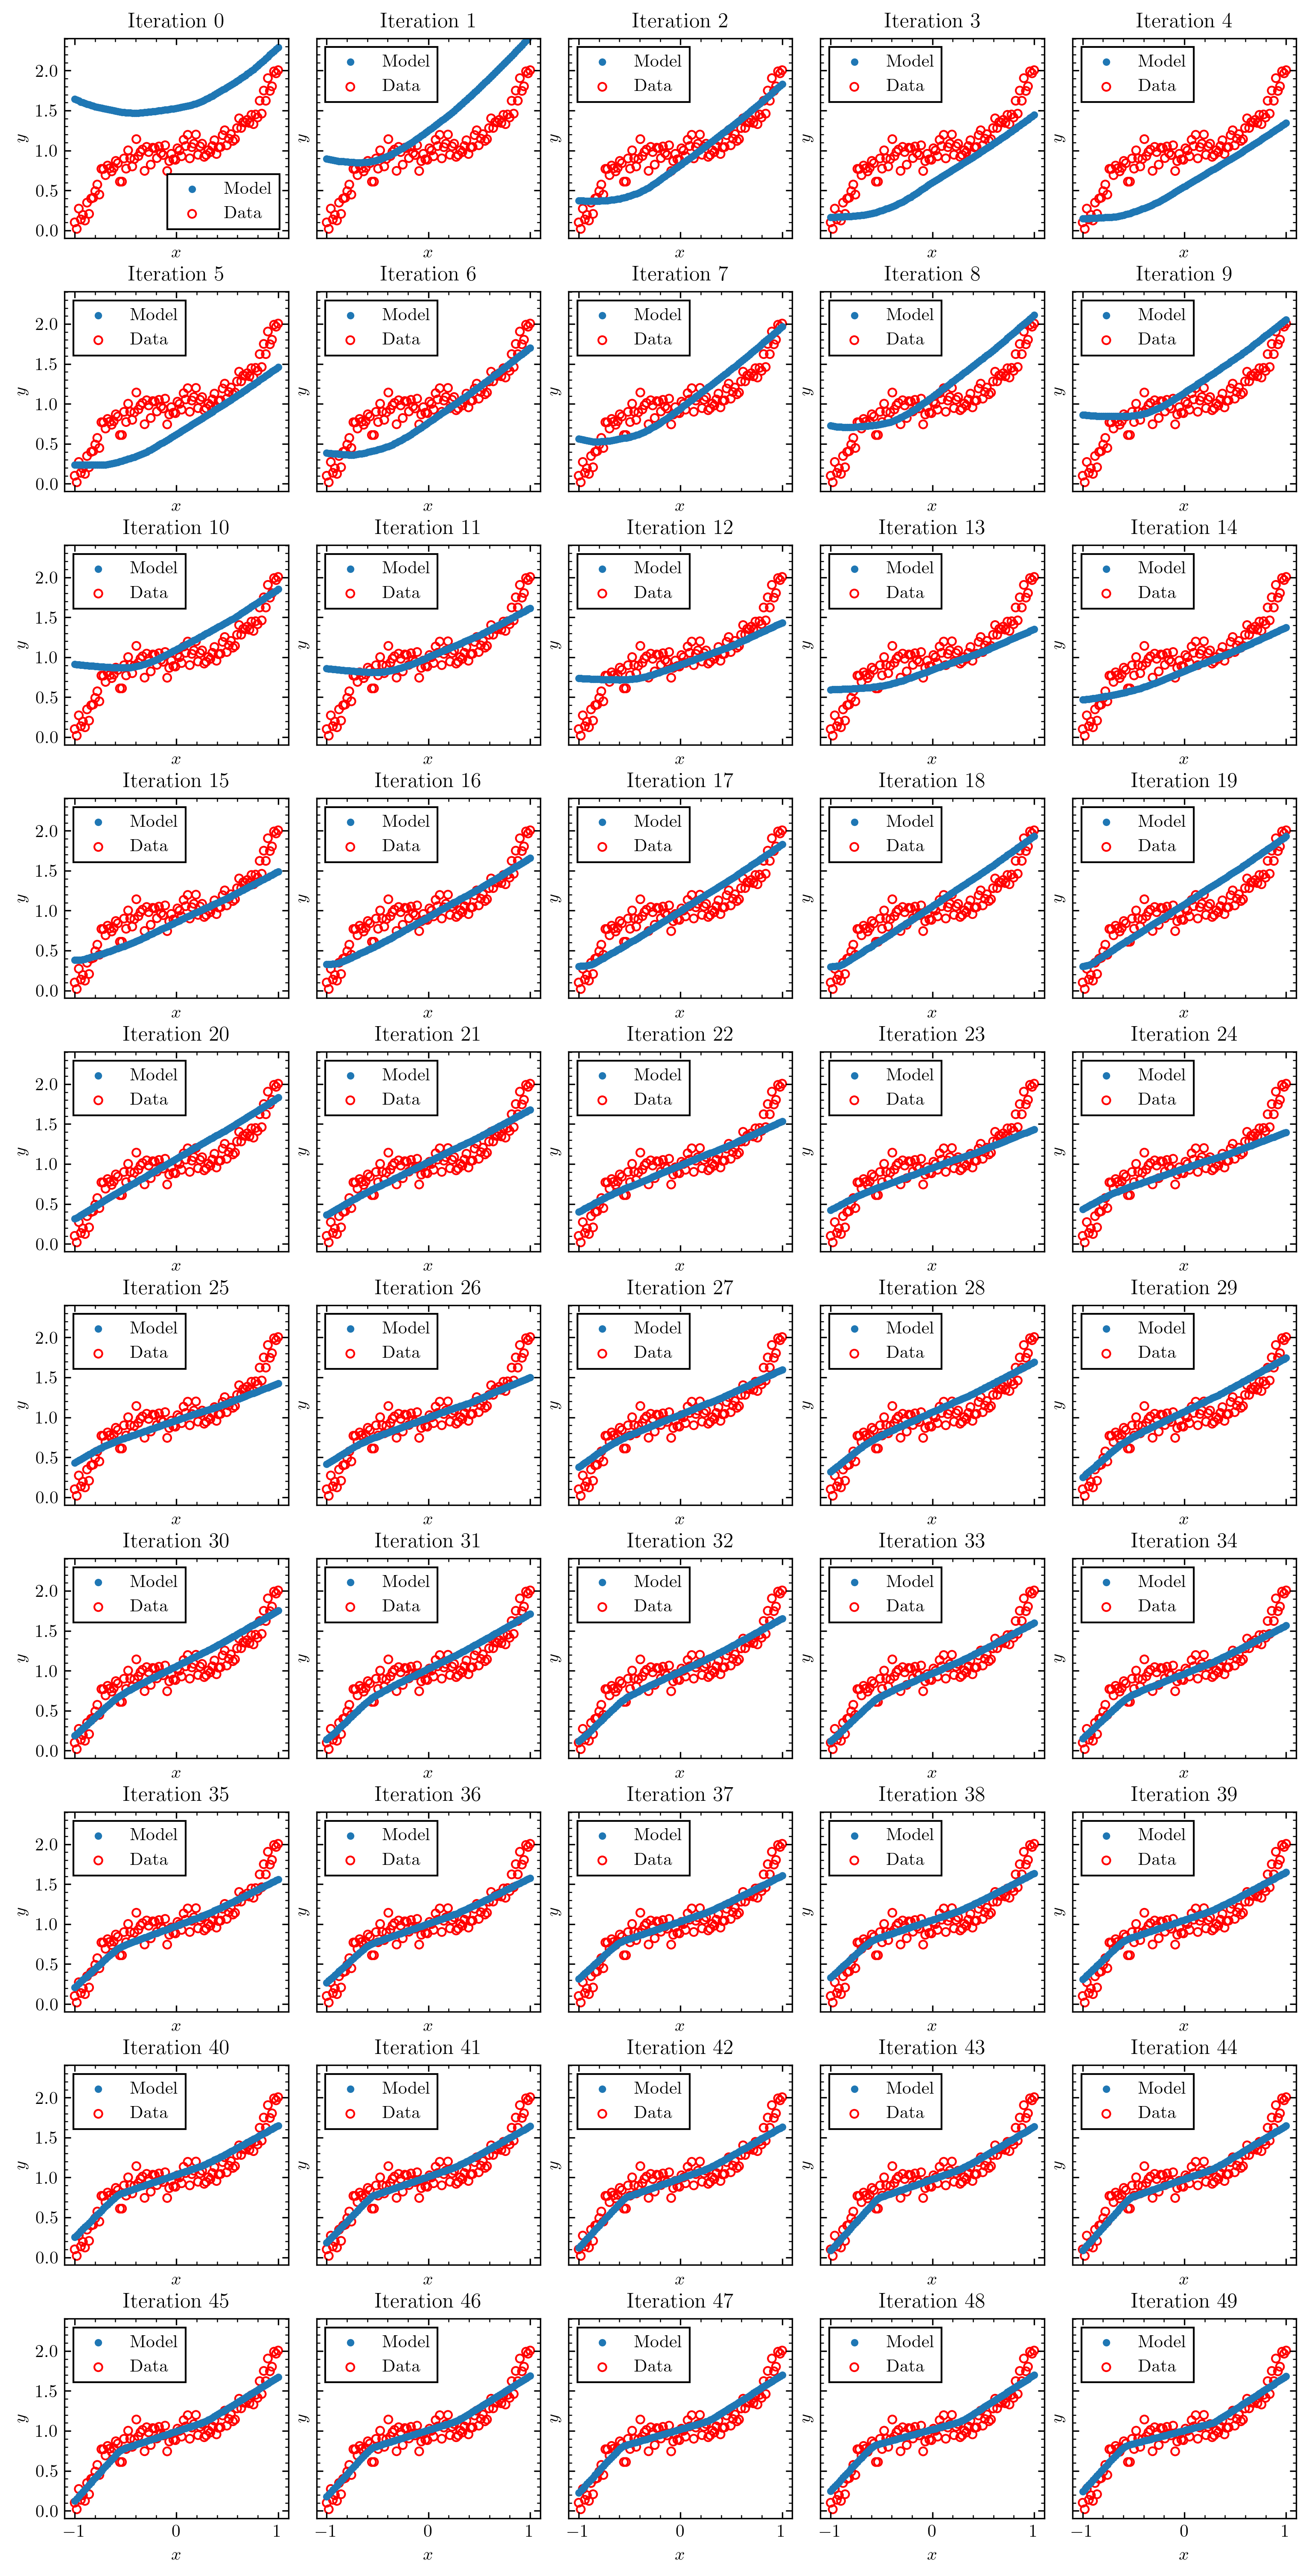

In [12]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(learning_rate_init=0.1)
fig, axs = plt.subplots(figsize=(10, 20), ncols=5, nrows=10, sharex=True, sharey=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    nn.partial_fit(X, y)
    y_pred = nn.predict(X)
    ax.scatter(X[:, 0], y_pred, s=10, label='Model')
    ax.scatter(X[:, 0], y, fc='none', ec='red', zorder=-1, s=20, label='Data')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim(axs[0].get_ylim())
    ax.set_title(f'Iteration {i}')
    ax.legend(loc='best')

plt.tight_layout(pad=0.3)

## Input Scaling

The neural networks work best if the input features and target variables have roughly zero 0 mean and unit variance. In fact, they may perform horribly, otherwise. We can use `sklearn.preprocessing.StandardScaler` to rescale the features and target variables.

In [69]:
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)
scaler_x = StandardScaler().fit(X)
scaler_y = StandardScaler().fit(y.reshape(-1, 1))
X_sc = scaler_x.transform(X)
y_sc = scaler_y.transform(y.reshape(-1, 1)).flatten()

print(f'Means of Scaled X: {', '.join([f'{m:.3f}' for m in np.mean(X_sc, axis=0)])}')
print(f'Variances of Scaled X: {', '.join([f'{v:.3f}' for v in np.var(X_sc, axis=0)])}')

print(f'Inverse Transform Works: {np.allclose(X, scaler_x.inverse_transform(X_sc))}')

Means of Scaled X: 0.000, 0.000, 0.000, -0.000, -0.000, 0.000, -0.000, -0.000
Variances of Scaled X: 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000
Inverse Transform Works: True


## Training Curve

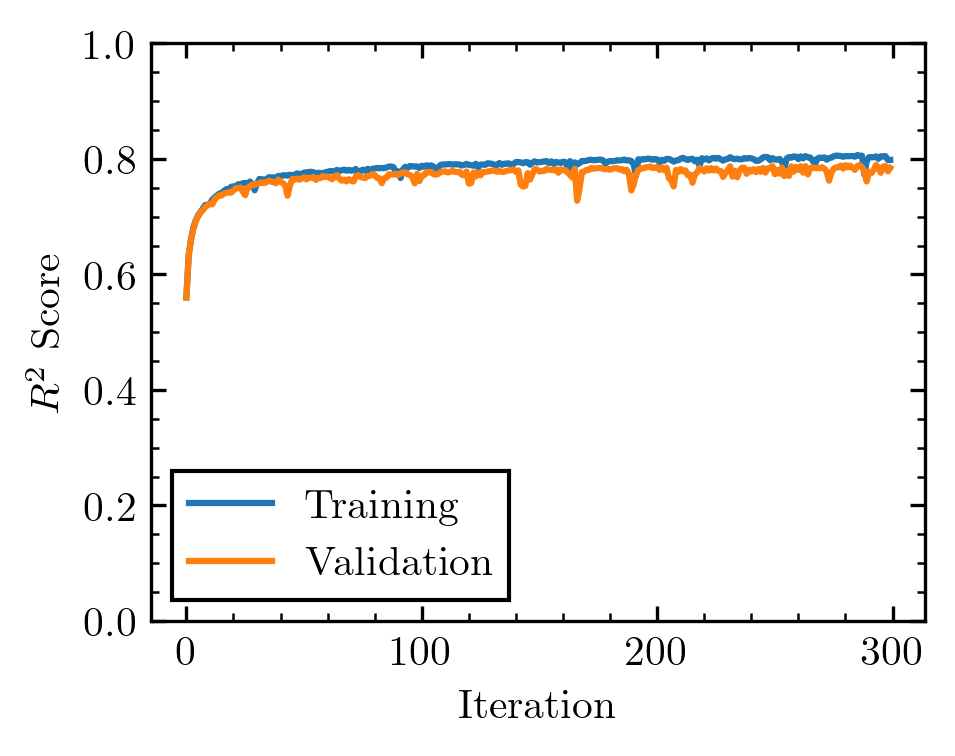

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1)).flatten()
max_iter = 300
train_r2 = np.zeros(max_iter)
test_r2 = np.zeros(max_iter)
n_splits = 5

for train_idx, test_idx in KFold(shuffle=True, n_splits=n_splits).split(X):
    nn = MLPRegressor(max_iter=max_iter)
    for i in range(nn.max_iter):
        nn = nn.partial_fit(X[train_idx], y[train_idx])
        for idx, r2 in zip([train_idx, test_idx], [train_r2, test_r2]):
            r2[i] += r2_score(y[idx], nn.predict(X[idx])) / n_splits

plt.plot(train_r2, label='Training')
plt.plot(test_r2, label='Validation')
plt.ylim(0, 1)
plt.xlabel('Iteration')
plt.ylabel(r'$R^2$ Score')
plt.legend(loc='best');

# Exercise

Let's return to the California housing data set that we previously studied with random forests and linear regression. As before, the goal is to predict the median house value based on $8$ other predictive attributes. Optimize the hyperparameters of the neural network using cross-validation. What are the (near) optimal parameters and score? Try to achieve an $R^2$ score of at least $0.85$.

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

X, y = fetch_california_housing(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1)).flatten()


param_grid = dict(hidden_layer_sizes = [[300, 300, 300], [500, 500, 500], [300, 300, 300, 300]],
                  learning_rate_init = np.linspace(0.001, 0.1, 3),
                  max_iter = [500, 600],
                  early_stopping = [True])

model = GridSearchCV(MLPRegressor(), param_grid=param_grid, n_jobs=-1, verbose=True)
model.fit(X, y)

# dataframe results
df = pd.DataFrame(model.cv_results_)
results = df.rename(columns={f'param_{param}' : param for param in param_grid.keys()})
results = results[[param for param in param_grid.keys()] + ['mean_test_score', 'rank_test_score', 'std_test_score']]
results = results.sort_values(by='rank_test_score')
display(results)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/quinnhelfand/Documents/GitHub/School/ISCI-396/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/quinnhelfand/Documents/GitHub/School/ISCI-396/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/quinnhelfand/Documents/GitHub/School/ISCI-396/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/quinnhelfand/Documents/GitHub/School/ISCI-396/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/U

KeyboardInterrupt: 